In [17]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [18]:
from utility_fn import train_test_split
from normalize import log_norm
#from utility_fn import trial_krn

In [19]:
data = np.loadtxt('data/data_spectrum.csv')
params = np.loadtxt('data/params_spectrum.csv')
print(data.shape)
print(params.shape)
data = log_norm(data)
data_noisy = data + 0.5*np.random.normal(size = data.shape)

(10000, 128)
(10000, 2)


In [20]:
(x_train,y_train) , (x_test,y_test) = train_test_split(data , params , 0.2)
x_train_noisy = x_train+0.4*np.random.normal(size=x_train.shape)
x_test_noisy = x_test+0.4*np.random.normal(size=x_test.shape)

# Designing Encoder

In [28]:
enc_inputs = keras.Input(shape=(128 , ))
x = layers.Dense(64 , activation='relu')(enc_inputs)
x = layers.Dense(64, activation='relu')(x)
enc_outputs = layers.Dense(32, activation='relu')(x)

x = layers.Dense(64 , activation='relu')(enc_outputs)
x =  layers.Dense(64 , activation='relu')(x)
x = layers.Dense(128)(x)
dec_outputs = layers.LeakyReLU(alpha = 0.7)(x)



In [6]:
encoder = keras.Model(inputs=enc_inputs , outputs=enc_outputs , name = 'encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
Total params: 14,496
Trainable params: 14,496
Non-trainable params: 0
_________________________________________________________________


In [7]:
auto_encoder = keras.Model(inputs=enc_inputs , outputs=dec_outputs , name = 'autoencoder')
auto_encoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               

In [8]:
auto_encoder.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [9]:
auto_encoder.fit( x_train , x_train , validation_split=0.3 , epochs = 30)

Epoch 1/30
175/175 [==============================] - 0s 2ms/step - loss: 0.0972 - val_loss: 0.0139
Epoch 2/30
175/175 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0076
Epoch 3/30
175/175 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0059
Epoch 4/30
175/175 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0108
Epoch 5/30
175/175 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 6/30
175/175 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0060
Epoch 7/30
175/175 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0061
Epoch 8/30
175/175 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0063
Epoch 9/30
175/175 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0051
Epoch 10/30
175/175 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0053

In [29]:
dae = keras.Model(inputs=enc_inputs , outputs=dec_outputs , name = 'autoencoder')
dae.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128)]             0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 128)               

In [30]:
dae.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [31]:
dae_history = dae.fit(x_train_noisy , x_train , validation_split=0.3 , epochs = 30)

Epoch 1/30
175/175 [==============================] - 0s 2ms/step - loss: 0.1185 - val_loss: 0.0630
Epoch 2/30
175/175 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.0409
Epoch 3/30
175/175 [==============================] - 0s 1ms/step - loss: 0.0405 - val_loss: 0.0408
Epoch 4/30
175/175 [==============================] - 0s 1ms/step - loss: 0.0402 - val_loss: 0.0414
Epoch 5/30
175/175 [==============================] - 0s 1ms/step - loss: 0.0379 - val_loss: 0.0382
Epoch 6/30
175/175 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0386
Epoch 7/30
175/175 [==============================] - 0s 1ms/step - loss: 0.0372 - val_loss: 0.0509
Epoch 8/30
175/175 [==============================] - 0s 2ms/step - loss: 0.0363 - val_loss: 0.0374
Epoch 9/30
175/175 [==============================] - 0s 2ms/step - loss: 0.0357 - val_loss: 0.0375
Epoch 10/30
175/175 [==============================] - 0s 2ms/step - loss: 0.0348 - val_loss: 0.0411

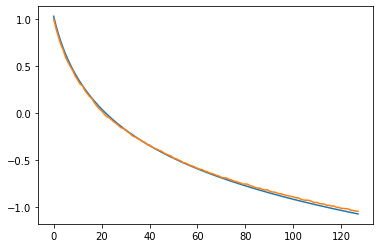

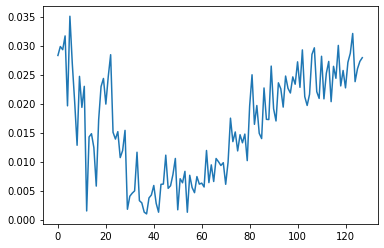

In [32]:
d_pred = auto_encoder.predict(data[10:11])

plt.plot(data[10:11][0])
plt.plot(d_pred[0])
plt.show()
plt.plot(abs((data[10:11][0]-d_pred[0])))
plt.show()

# Adding Noise

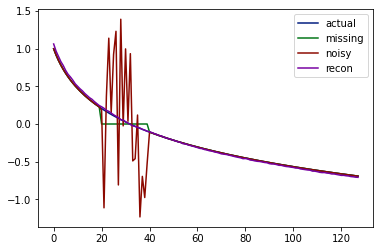

In [33]:
d_missing = np.copy(data[0:1])
d_missing[0][20:40] = np.zeros(20)
d_noisy = np.copy(d_missing)
d_noisy[0][20:40] = np.random.normal(size=20) 
d_pred = auto_encoder.predict(d_missing)

plt.style.use('seaborn-dark-palette')
plt.plot(data[0:1][0] , label = 'actual')
plt.plot(d_missing[0] , label='missing')
plt.plot(d_noisy[0] , label='noisy')
plt.plot(d_pred[0] , label='recon')
plt.legend(['actual' , 'missing' , 'noisy' , 'recon'])
plt.show()
#plt.plot(abs((data[10:11][0]-d_pred[0])))
#plt.show()

In [34]:
pred_model = keras.models.load_model('fc_model')
pred_model.summary()

Model: "regressor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_43 (InputLayer)        [(None, 128)]             0         
_________________________________________________________________
dense_141 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_142 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_143 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_144 (Dense)            (None, 2)                 66        
Total params: 14,562
Trainable params: 14,562
Non-trainable params: 0
_________________________________________________________________


In [35]:
proper_pred = pred_model.predict(x_train[0:1])
noisy_pred = pred_model.predict(d_pred)
missing_pred = pred_model.predict(d_missing)
true_p = params[0:1]
print(proper_pred)
print(missing_pred)
print(noisy_pred)
print(true_p)

[[2.136221  1.3167217]]
[[1.5207183 2.702897 ]]
[[1.6646668 1.9879026]]
[[1.58345818 2.29040627]]


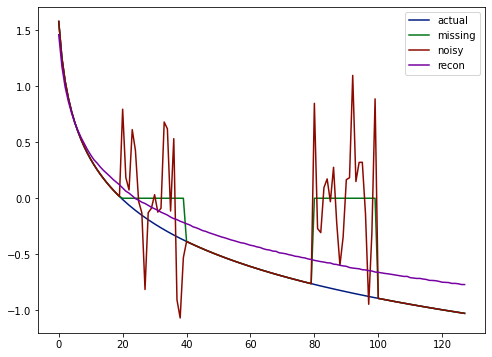

In [146]:
d_missing = np.copy(data[0:1])
d_missing[0][20:40] = np.zeros(20)
d_missing[0][80:100] = np.zeros(20)
d_noisy = np.copy(d_missing)
d_noisy[0][20:40] = 0.5*np.random.normal(size=20) 
d_noisy[0][80:100] = 0.5*np.random.normal(size=20) 
d_pred = dae.predict(d_noisy)

plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(8,6))
plt.plot(data[0:1][0] , label = 'actual')
plt.plot(d_missing[0] , label='missing')
plt.plot(d_noisy[0] , label='noisy')
plt.plot(d_pred[0] , label='recon')
plt.legend(['actual' , 'missing' , 'noisy' , 'recon'])
plt.show()
#plt.plot(abs((data[10:11][0]-d_pred[0])))
#plt.show()

Problem im getting now is  , since we are adding normal distribution with mean 0 and variance 1.0
hence in the prediction it just raises the value of the lower side,

we want the mean of the noise being added to follow the same trend as that 
of the data value only , 
so once we have found the likely data trend by denoising auto encoder ,
we can again 'add'(not multiply) this output (denoised output) to the noisy data ,
so the mean of distribution will get closer to the actual distribution.
then call this as the new noisy data
the once again pass this through denoiser ,

continue this loop
so one solution maybe that , 

In [134]:
proper_pred = pred_model.predict(data[0:1])
noisy_pred = pred_model.predict(d_pred)
missing_pred = pred_model.predict(d_missing)
true_p = params[0:1]

print('true_param:' , true_p)
print('Proper data prediction:' , proper_pred)
print('prediction on missing data:' , missing_pred)
print('prediction on reconstructed data:' , noisy_pred)

true_param: [[2.23685133 1.7316627 ]]
Proper data prediction: [[2.2370088 1.7263913]]
prediction on missing data: [[1.8855422 2.5612636]]
prediction on reconstructed data: [[1.8785461 1.6719625]]


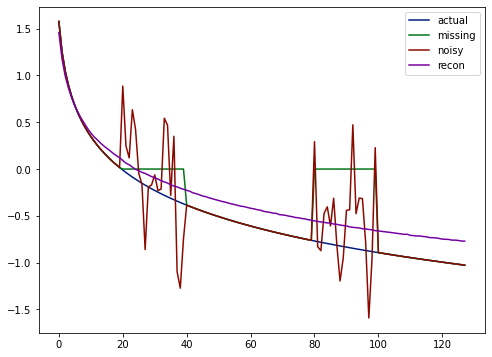

In [147]:
d_noisy[0][20:40] = d_pred[0][20:40]+d_noisy[0][20:40]   
d_noisy[0][80:100] = d_pred[0][80:100]+d_noisy[0][80:100]   

plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(8,6))
plt.plot(data[0:1][0] , label = 'actual')
plt.plot(d_missing[0] , label='missing')
plt.plot(d_noisy[0] , label='noisy')
plt.plot(d_pred[0] , label='recon')
plt.legend(['actual' , 'missing' , 'noisy' , 'recon'])
plt.show()
#plt.plot(abs((data[10:11][0]-d_pred[0])))
#plt.show()

see above plot , now the noise mean seems to follow the likely distribution ,
lets do denoising again on this modified noise data

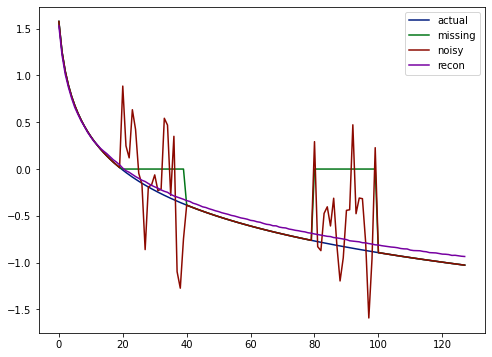

In [148]:
d_pred = dae.predict(d_noisy)

plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(8,6))
plt.plot(data[0:1][0] , label = 'actual')
plt.plot(d_missing[0] , label='missing')
plt.plot(d_noisy[0] , label='noisy')
plt.plot(d_pred[0] , label='recon')
plt.legend(['actual' , 'missing' , 'noisy' , 'recon'])
plt.show()

see the above plot , now the denoised output seems more closer to the true data , 
lets see the parameters prediction values now

In [149]:
proper_pred = pred_model.predict(data[0:1])
noisy_pred = pred_model.predict(d_pred)
missing_pred = pred_model.predict(d_missing)
true_p = params[0:1]

print('true_param:' , true_p)
print('Proper data prediction:' , proper_pred)
print('prediction on missing data:' , missing_pred)
print('prediction on reconstructed data:' , noisy_pred)

true_param: [[2.23685133 1.7316627 ]]
Proper data prediction: [[2.2370088 1.7263913]]
prediction on missing data: [[1.8855422 2.5612636]]
prediction on reconstructed data: [[2.0948975 1.8685734]]


Now compare this with earlier predictions,now its much much better
lets run this loop a few more times

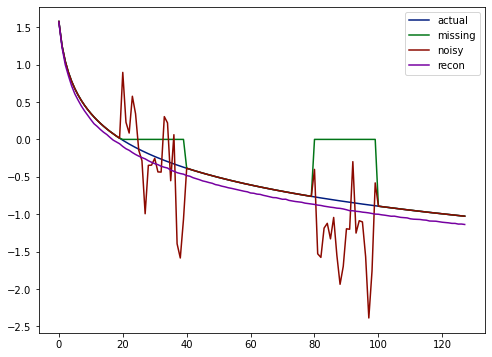

In [150]:
d_noisy[0][20:40] = d_pred[0][20:40]+d_noisy[0][20:40]   
d_noisy[0][80:100] = d_pred[0][80:100]+d_noisy[0][80:100]   

d_pred = dae.predict(d_noisy)

plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(8,6))
plt.plot(data[0:1][0] , label = 'actual')
plt.plot(d_missing[0] , label='missing')
plt.plot(d_noisy[0] , label='noisy')
plt.plot(d_pred[0] , label='recon')
plt.legend(['actual' , 'missing' , 'noisy' , 'recon'])
plt.show()
#plt.plot(abs((data[10:11][0]-d_pred[0])))
#plt.show()

In [151]:
proper_pred = pred_model.predict(data[0:1])
noisy_pred = pred_model.predict(d_pred)
missing_pred = pred_model.predict(d_missing)
true_p = params[0:1]

print('true_param:' , true_p)
print('Proper data prediction:' , proper_pred)
print('prediction on missing data:' , missing_pred)
print('prediction on reconstructed data:' , noisy_pred)

true_param: [[2.23685133 1.7316627 ]]
Proper data prediction: [[2.2370088 1.7263913]]
prediction on missing data: [[1.8855422 2.5612636]]
prediction on reconstructed data: [[2.2958224 2.0246103]]


Ahhh , now we have a problem , too much is getting subtracted , maybe addition is not a good idea , but it sure works for one loop

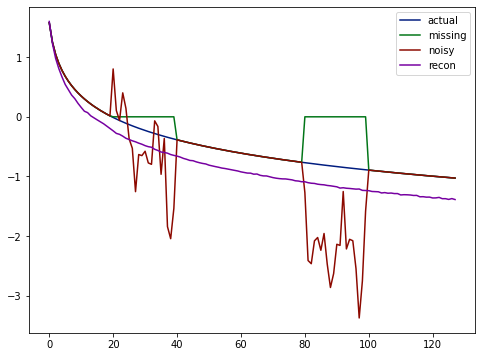

In [152]:
d_noisy[0][20:40] = d_pred[0][20:40]+d_noisy[0][20:40]   
d_noisy[0][80:100] = d_pred[0][80:100]+d_noisy[0][80:100]   

d_pred = dae.predict(d_noisy)

plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(8,6))
plt.plot(data[0:1][0] , label = 'actual')
plt.plot(d_missing[0] , label='missing')
plt.plot(d_noisy[0] , label='noisy')
plt.plot(d_pred[0] , label='recon')
plt.legend(['actual' , 'missing' , 'noisy' , 'recon'])
plt.show()
#plt.plot(abs((data[10:11][0]-d_pred[0])))
#plt.show()

In [153]:
proper_pred = pred_model.predict(data[0:1])
noisy_pred = pred_model.predict(d_pred)
missing_pred = pred_model.predict(d_missing)
true_p = params[0:1]

print('true_param:' , true_p)
print('Proper data prediction:' , proper_pred)
print('prediction on missing data:' , missing_pred)
print('prediction on reconstructed data:' , noisy_pred)

true_param: [[2.23685133 1.7316627 ]]
Proper data prediction: [[2.2370088 1.7263913]]
prediction on missing data: [[1.8855422 2.5612636]]
prediction on reconstructed data: [[2.5427022 2.2137847]]


Lets see the entire thing on some other data - point
obviously , i wolud need to quantify this entire procedure for  a more qualitative approach , like defining the loss for entire dataset (maybe)

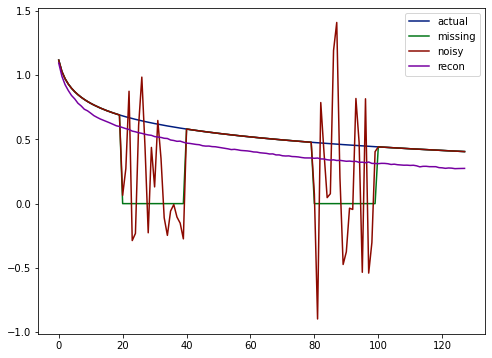

true_param: [[0.61177407 0.69605106]]
Proper data prediction: [[0.6131964  0.70847195]]
prediction on missing data: [[0.61389947 7.914525  ]]
prediction on reconstructed data: [[0.70663166 1.4621823 ]]


In [172]:
d_missing = np.copy(data[18:19])
d_missing[0][20:40] = np.zeros(20)
d_missing[0][80:100] = np.zeros(20)
d_noisy = np.copy(d_missing)
d_noisy[0][20:40] = 0.5*np.random.normal(size=20) 
d_noisy[0][80:100] = 0.5*np.random.normal(size=20) 
d_pred = auto_encoder.predict(d_noisy)

plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(8,6))
plt.plot(data[18:19][0] , label = 'actual')
plt.plot(d_missing[0] , label='missing')
plt.plot(d_noisy[0] , label='noisy')
plt.plot(d_pred[0] , label='recon')
plt.legend(['actual' , 'missing' , 'noisy' , 'recon'])
plt.show()
#plt.plot(abs((data[10:11][0]-d_pred[0])))
#plt.show()
proper_pred = pred_model.predict(data[18:19])
noisy_pred = pred_model.predict(d_pred)
missing_pred = pred_model.predict(d_missing)
true_p = params[18:19]

print('true_param:' , true_p)
print('Proper data prediction:' , proper_pred)
print('prediction on missing data:' , missing_pred)
print('prediction on reconstructed data:' , noisy_pred)

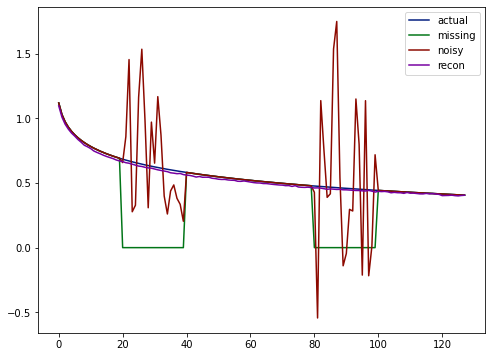

true_param: [[0.61177407 0.69605106]]
Proper data prediction: [[0.6131964  0.70847195]]
prediction on missing data: [[0.61389947 7.914525  ]]
prediction on reconstructed data: [[0.59474885 0.96093726]]


In [173]:
d_noisy[0][20:40] = d_pred[0][20:40]+d_noisy[0][20:40]   
d_noisy[0][80:100] = d_pred[0][80:100]+d_noisy[0][80:100]   

d_pred = auto_encoder.predict(d_noisy)

plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(8,6))
plt.plot(data[18:19][0] , label = 'actual')
plt.plot(d_missing[0] , label='missing')
plt.plot(d_noisy[0] , label='noisy')
plt.plot(d_pred[0] , label='recon')
plt.legend(['actual' , 'missing' , 'noisy' , 'recon'])
plt.show()
#plt.plot(abs((data[10:11][0]-d_pred[0])))
#plt.show()
proper_pred = pred_model.predict(data[18:19])
noisy_pred = pred_model.predict(d_pred)
missing_pred = pred_model.predict(d_missing)
true_p = params[18:19]

print('true_param:' , true_p)
print('Proper data prediction:' , proper_pred)
print('prediction on missing data:' , missing_pred)
print('prediction on reconstructed data:' , noisy_pred)

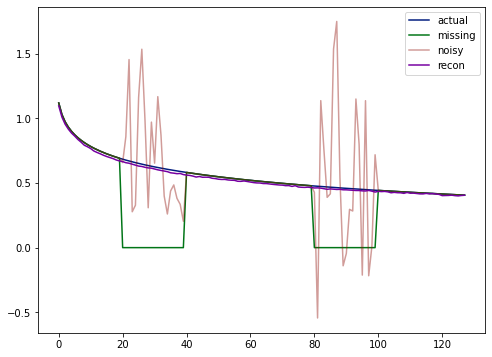

true_param: [[0.61177407 0.69605106]]
Proper data prediction: [[0.6131964  0.70847195]]
prediction on missing data: [[0.61389947 7.914525  ]]
prediction on reconstructed data: [[0.59474885 0.96093726]]


In [174]:


plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(8,6))
plt.plot(data[18:19][0] , label = 'actual')
plt.plot(d_missing[0] , label='missing')
plt.plot(d_noisy[0] , label='noisy' , alpha = 0.4)
plt.plot(d_pred[0] , label='recon')
plt.legend(['actual' , 'missing' , 'noisy' , 'recon'])
plt.show()
#plt.plot(abs((data[10:11][0]-d_pred[0])))
#plt.show()
proper_pred = pred_model.predict(data[18:19])
noisy_pred = pred_model.predict(d_pred)
missing_pred = pred_model.predict(d_missing)
true_p = params[18:19]

print('true_param:' , true_p)
print('Proper data prediction:' , proper_pred)
print('prediction on missing data:' , missing_pred)
print('prediction on reconstructed data:' , noisy_pred)